# M6 - WEEK 6 | PROJECT: Kaggle Competition - Predict Traffic Congestion


**Assignment Background:**

The final assignment you will work on is going to be a bit different. You will combine a lot of the skills and knowledge you have built on throughout the modules and participate in a Kaggle competition.


**Assignment Scope:**

Your task is to predict traffic congestion based on aggregate measures of  stopping distance and waiting times at intersections in 4 major US cities. Follow the instructions in the competition to make sure you understand the problem, data and submission requirements.


As you are building a predictive model or models, make sure you follow some of the best practices we have learned so far:

1)    Clean and then visually explore your data before you start the analysis

2)    Don’t just make assumptions, whenever possible, use statistical analysis to test hypotheses and find relationships in the data

3)    Build and compare predictive models in terms of their performance

Submit your Jupyter notebook and link to a Kaggle kernel. What is your position in the leader board?


**Data Source:** 

Dataset: https://www.kaggle.com/c/bigquery-geotab-intersection-congestion/overview

**Tool and Packages:**

 * python language 3.7.2
 * python library : numpy, pandas, matplotlib.pyplot, keras, sklearn
 

**Importing Python Libs:**

In [108]:
#import pacakages and libs:

import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

# IMport sklearn modules:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import lightgbm as lgb

## Data Processing : Loading, Cleaning and Pre-Processing

In [109]:
#loading training and test dataset: using pandas 
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [110]:
pd.set_option('display.max_columns', 50)

#First 5 rows of dataframe:
train.head(2)

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,Month,Path,TotalTimeStopped_p20,TotalTimeStopped_p40,TotalTimeStopped_p50,TotalTimeStopped_p60,TotalTimeStopped_p80,TimeFromFirstStop_p20,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City
0,1920335,0,33.79166,-84.43003,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,0,0,6,Marietta Boulevard Northwest_NW_Marietta Boule...,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta
1,1920336,0,33.79166,-84.43003,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,0,0,6,Marietta Boulevard Northwest_SE_Marietta Boule...,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta


In [111]:
pd.set_option('display.max_columns', 50)

#First 5 rows of dataframe:
test.head(2)

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,Month,Path,City
0,0,1,33.75094,-84.39303,Peachtree Street Southwest,Mitchell Street Southwest,SW,SE,0,0,6,Peachtree Street Southwest_SW_Mitchell Street ...,Atlanta
1,1,1,33.75094,-84.39303,Peachtree Street Southwest,Peachtree Street Southwest,SW,SW,0,0,6,Peachtree Street Southwest_SW_Peachtree Street...,Atlanta


In [112]:
#checking rows and clolumns:
train.shape, test.shape

((857409, 28), (1920335, 13))

In [113]:
#checking missing or NaN values: training dataset
train.isnull().sum()

RowId                         0
IntersectionId                0
Latitude                      0
Longitude                     0
EntryStreetName            8189
ExitStreetName             5534
EntryHeading                  0
ExitHeading                   0
Hour                          0
Weekend                       0
Month                         0
Path                          0
TotalTimeStopped_p20          0
TotalTimeStopped_p40          0
TotalTimeStopped_p50          0
TotalTimeStopped_p60          0
TotalTimeStopped_p80          0
TimeFromFirstStop_p20         0
TimeFromFirstStop_p40         0
TimeFromFirstStop_p50         0
TimeFromFirstStop_p60         0
TimeFromFirstStop_p80         0
DistanceToFirstStop_p20       0
DistanceToFirstStop_p40       0
DistanceToFirstStop_p50       0
DistanceToFirstStop_p60       0
DistanceToFirstStop_p80       0
City                          0
dtype: int64

In [114]:
#checking missing or NaN values: test dataset
test.isnull().sum()

RowId                  0
IntersectionId         0
Latitude               0
Longitude              0
EntryStreetName    19157
ExitStreetName     16340
EntryHeading           0
ExitHeading            0
Hour                   0
Weekend                0
Month                  0
Path                   0
City                   0
dtype: int64

In [115]:
train.describe(include=['object'])

,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Path,City
count,849220,851875,857409,857409,857409,857409
unique,1707,1693,8,8,15111,4
top,North Broad Street,North Broad Street,E,W,North Broad Street_N_North Broad Street_N,Philadelphia
freq,18938,19507,172814,173419,7032,388322


In [116]:
#describing numerical - excluding rowID and intersectionID
train.iloc[:, 2:].describe()

,Latitude,Longitude,Hour,Weekend,Month,TotalTimeStopped_p20,TotalTimeStopped_p40,TotalTimeStopped_p50,TotalTimeStopped_p60,TotalTimeStopped_p80,TimeFromFirstStop_p20,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80
count,857409.000000,857409.000000,857409.000000,857409.000000,857409.000000,857409.000000,857409.000000,857409.000000,857409.000000,857409.000000,857409.000000,857409.000000,857409.000000,857409.000000,857409.000000,857409.000000,857409.000000,857409.000000,857409.000000,857409.000000
mean,39.657555,-77.900396,12.427463,0.277485,9.104448,1.731272,5.356027,7.681874,11.905296,22.948071,3.126932,9.051338,12.613628,18.801785,34.037097,6.564450,19.872987,28.255852,43.273503,81.922639
std,2.920760,5.975814,6.062097,0.447758,1.993233,7.080017,12.861420,15.553418,19.631821,28.118134,11.631092,20.120829,23.847749,29.399634,40.619387,28.003261,56.564229,71.720090,96.933561,152.682760
min,33.649970,-87.836750,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.937600,-84.387710,8.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.985810,-75.173270,13.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,60.400000
75%,41.918580,-75.080190,17.000000,1.000000,11.000000,0.000000,0.000000,10.000000,19.000000,35.000000,0.000000,0.000000,22.000000,31.000000,49.000000,0.000000,0.000000,52.900000,64.100000,85.600000
max,42.381780,-71.023520,23.000000,1.000000,12.000000,273.000000,318.000000,343.000000,368.000000,689.000000,334.000000,347.000000,355.000000,358.000000,359.000000,1902.700000,3099.500000,3099.500000,3581.600000,4064.300000


In [117]:
#dropping all NaN values: from training and test dataset
train.dropna(inplace=True)
test.dropna(inplace=True)

In [118]:
#checking shape: training and test dataset
train.shape, test.shape

((844259, 28), (1886327, 13))

In [119]:
#checking dtypes memory usage: training dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844259 entries, 0 to 857408
Data columns (total 28 columns):
RowId                      844259 non-null int64
IntersectionId             844259 non-null int64
Latitude                   844259 non-null float64
Longitude                  844259 non-null float64
EntryStreetName            844259 non-null object
ExitStreetName             844259 non-null object
EntryHeading               844259 non-null object
ExitHeading                844259 non-null object
Hour                       844259 non-null int64
Weekend                    844259 non-null int64
Month                      844259 non-null int64
Path                       844259 non-null object
TotalTimeStopped_p20       844259 non-null int64
TotalTimeStopped_p40       844259 non-null int64
TotalTimeStopped_p50       844259 non-null int64
TotalTimeStopped_p60       844259 non-null int64
TotalTimeStopped_p80       844259 non-null int64
TimeFromFirstStop_p20      844259 non-null int6

In [120]:
#checking dtypes memory usage: testing dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1886327 entries, 0 to 1920334
Data columns (total 13 columns):
RowId              int64
IntersectionId     int64
Latitude           float64
Longitude          float64
EntryStreetName    object
ExitStreetName     object
EntryHeading       object
ExitHeading        object
Hour               int64
Weekend            int64
Month              int64
Path               object
City               object
dtypes: float64(2), int64(5), object(6)
memory usage: 201.5+ MB


In [121]:
#using available function to reduce memory consumption:

'''Function to reduce the DF size'''
# source: https://www.kaggle.com/kernels/scriptcontent/3684066/download

def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [122]:
#function call : training data
train = reduce_mem_usage(train)

Memory usage of dataframe is 186.79 MB
Memory usage after optimization is: 49.23 MB
Decreased by 73.6%


In [123]:
#function call : testing data
test = reduce_mem_usage(test)

Memory usage of dataframe is 201.48 MB
Memory usage after optimization is: 54.93 MB
Decreased by 72.7%


* very few missing values in dataset only in - 'EntryStreetName' and 'ExitStreetName'
* found these categorical columns - 'EntryStreetName','ExitStreetName','EntryHeading','ExitHeading','Path','City'
* fload-64 dtypes are killer here! had to reduce the memory by using function call. Else we face out-of-memory error frequently during our analysis. Since both train and test are having huge data points.

# EDA: Statistical and Visualization

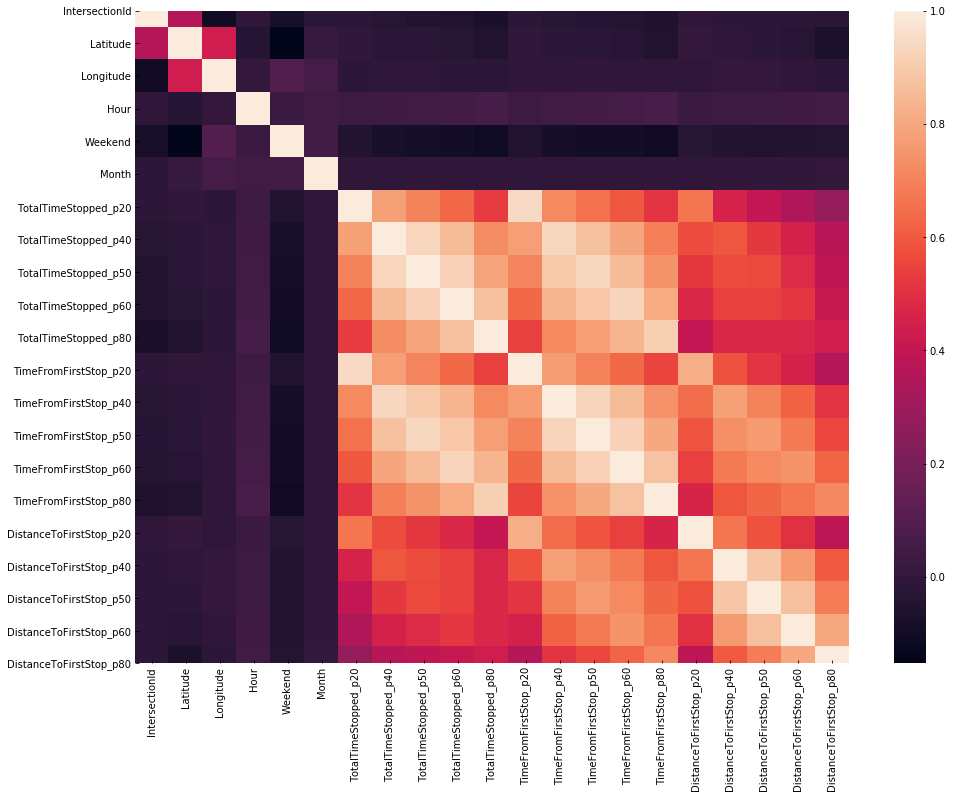

In [124]:
plt.subplots(figsize=(16,12))
sns.heatmap(train.iloc[:, 1:].corr())

Here we see that 'TimeToFirstStop' which is optional column in train data set has correlation with 'totalTimeStoped_20/40/50/80' targets!

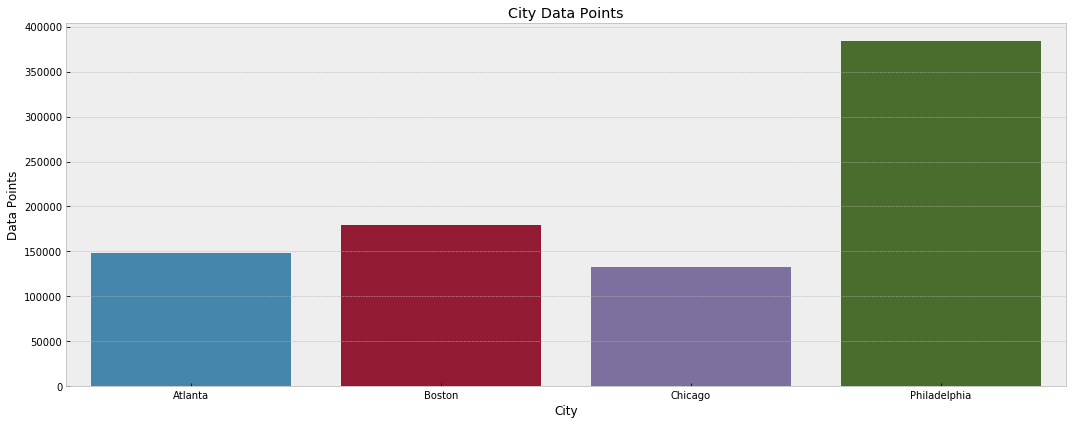

In [17]:
plt.style.use('bmh')
plt.figure(figsize=(15,6))
sns.countplot(x="City", data=train)
plt.title("City Data Points")
plt.ylabel("Data Points")
plt.xlabel("City")
plt.tight_layout()

   * There are 4 unique city in the dataset
   * Philadelphia is having highest data points in the training dataset, and then Boston

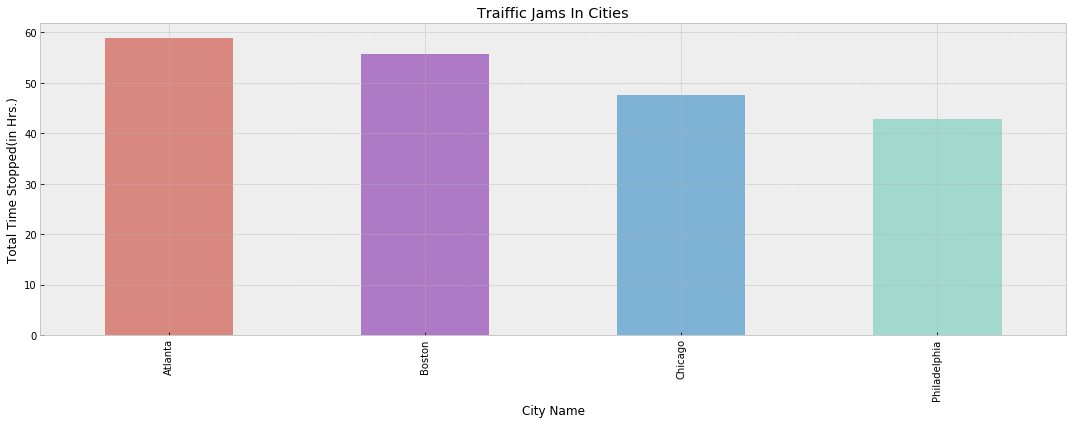

In [18]:
train['TotalTimeStopped'] = train['TotalTimeStopped_p20']+train['TotalTimeStopped_p40']\
                            +train['TotalTimeStopped_p50']+train['TotalTimeStopped_p60']\
                            +train['TotalTimeStopped_p80']

plt.style.use('bmh')
plt.figure(figsize=(15,6))
train.groupby('City')['TotalTimeStopped'].mean().plot(kind='bar', colors=['#D98880','#AF7AC5','#7FB3D5','#A2D9CE'])
plt.title("Traiffic Jams In Cities")
plt.ylabel("Total Time Stopped(in Hrs.)")
plt.xlabel("City Name")
plt.tight_layout()

Atlanta and Boston looks higher traffic jams than other cities!

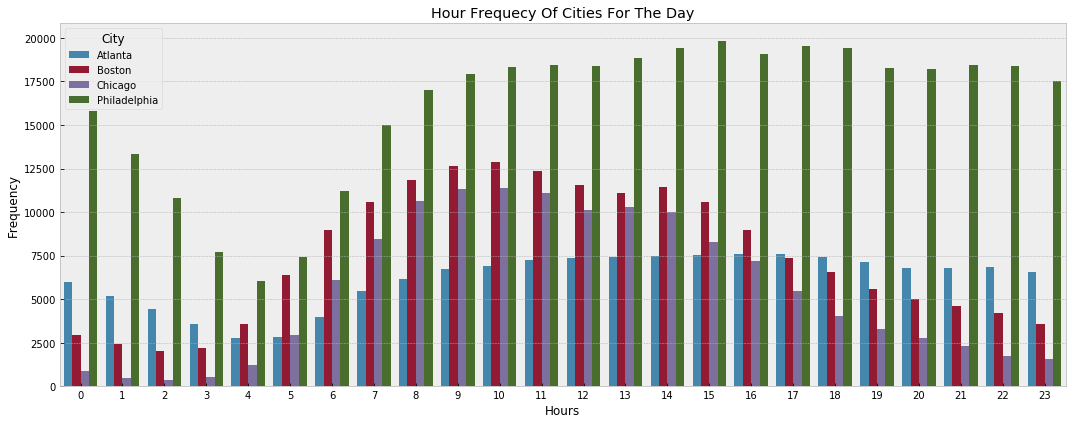

In [19]:
plt.style.use('bmh')
plt.figure(figsize=(15,6))
sns.countplot(x="Hour", data=train, hue='City')
plt.title("Hour Frequecy Of Cities For The Day")
plt.ylabel("Frequency")
plt.xlabel("Hours")
plt.tight_layout()

Philadelphia shows higher hour counts in dataset for hourly distribution.

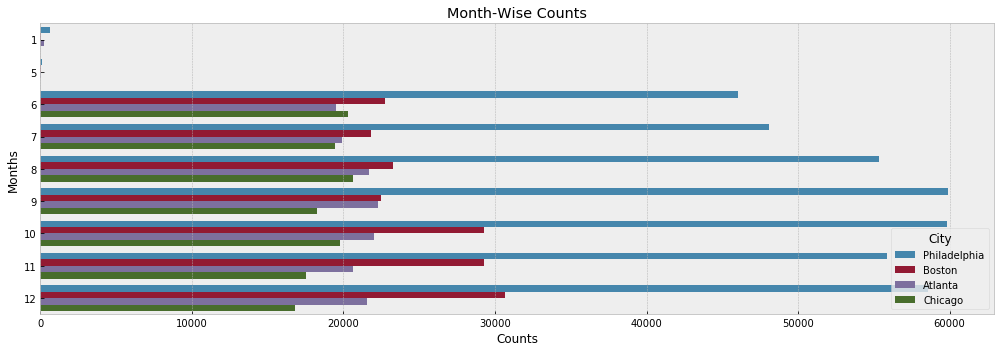

In [125]:
#months-wise data:
plt.style.use('bmh')
plt.subplots(figsize=(14, 5))
sns.countplot(y= 'Month', hue = 'City',data = train, hue_order=['Philadelphia','Boston','Atlanta', 'Chicago'])
plt.title("Month-Wise Counts")
plt.ylabel("Months")
plt.xlabel("Counts")
plt.tight_layout()

* Months - february, March, April are not hahving any data points here. 
* Months - January and May are very low data points 

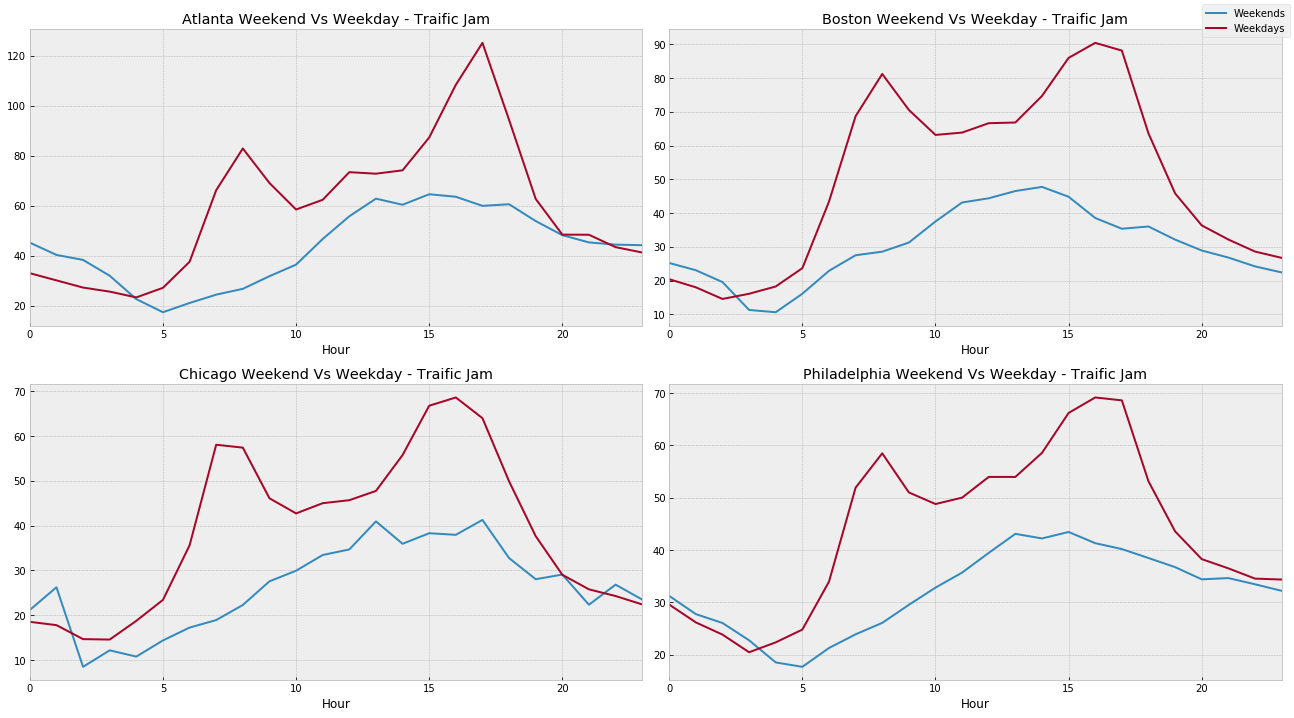

In [20]:
Atlanta = train[train['City']=='Atlanta']
Boston = train[train['City']=='Boston']
Chicago = train[train['City']=='Chicago']
Philadelphia = train[train['City']=='Philadelphia']


plt.style.use('bmh')
fig, axes = plt.subplots(nrows=2, ncols=2)

Atlanta_Weekend = Atlanta[Atlanta['Weekend'] == 1].groupby(['Hour'])['TotalTimeStopped'].mean()
Atlanta_Weekday = Atlanta[Atlanta['Weekend'] == 0].groupby(['Hour'])['TotalTimeStopped'].mean()
Atlanta_Weekend.plot(ax=axes[0,0],figsize=(18,10),title='Atlanta Weekend Vs Weekday - Traific Jam', label='Weekends')
Atlanta_Weekday.plot(ax=axes[0,0],figsize=(18,10), label='Weekdays')

Boston_Weekend = Boston[Boston['Weekend'] == 1].groupby(['Hour'])['TotalTimeStopped'].mean()
Boston_Weekday = Boston[Boston['Weekend'] == 0].groupby(['Hour'])['TotalTimeStopped'].mean()
Boston_Weekend.plot(ax=axes[0,1],figsize=(18,10),title='Boston Weekend Vs Weekday - Traific Jam', label='Weekends')
Boston_Weekday.plot(ax=axes[0,1],figsize=(18,10), label='Weekdays')

Chicago_Weekend = Chicago[Chicago['Weekend'] == 1].groupby(['Hour'])['TotalTimeStopped'].mean()
Chicago_Weekday = Chicago[Chicago['Weekend'] == 0].groupby(['Hour'])['TotalTimeStopped'].mean()
Chicago_Weekend.plot(ax=axes[1,0],figsize=(18,10),title='Chicago Weekend Vs Weekday - Traific Jam', label='Weekends')
Chicago_Weekday.plot(ax=axes[1,0],figsize=(18,10), label='Weekdays')

Philadelphia_Weekend = Philadelphia[Philadelphia['Weekend'] == 1].groupby(['Hour'])['TotalTimeStopped'].mean()
Philadelphia_Weekday = Philadelphia[Philadelphia['Weekend'] == 0].groupby(['Hour'])['TotalTimeStopped'].mean()
Philadelphia_Weekend.plot(ax=axes[1,1],figsize=(18,10),title='Philadelphia Weekend Vs Weekday - Traific Jam', label='Weekends')
Philadelphia_Weekday.plot(ax=axes[1,1],figsize=(18,10), label='Weekdays')

fig.legend(labels=['Weekends','Weekdays'])
fig.tight_layout()

* Weekdays is higher traffic days in all cities
* Atlanta and Boston hahing higher stop time than other countries

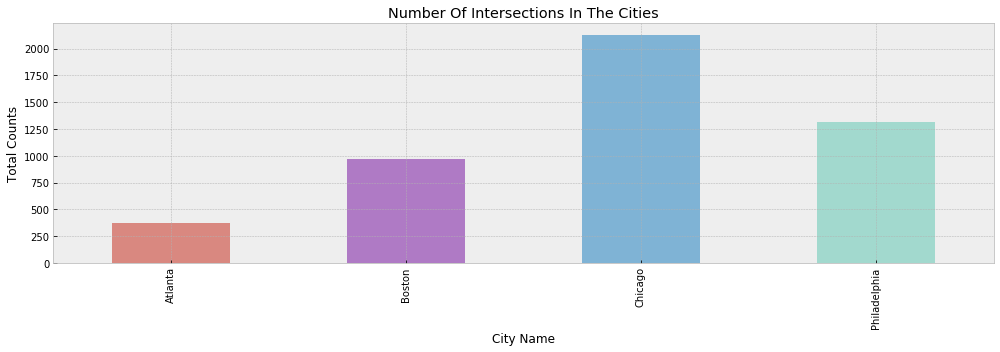

In [128]:
plt.style.use('bmh')
plt.subplots(figsize=(14, 5))
train.groupby(['City']).IntersectionId.nunique().sort_index().plot(kind='bar', 
                                                                   colors=['#D98880','#AF7AC5','#7FB3D5','#A2D9CE'])
plt.title("Number Of Intersections In The Cities")
plt.ylabel("Total Counts")
plt.xlabel("City Name")
plt.tight_layout()

* Looks city 'Chicago' has highest number of intersections and then 'Philadelphia'

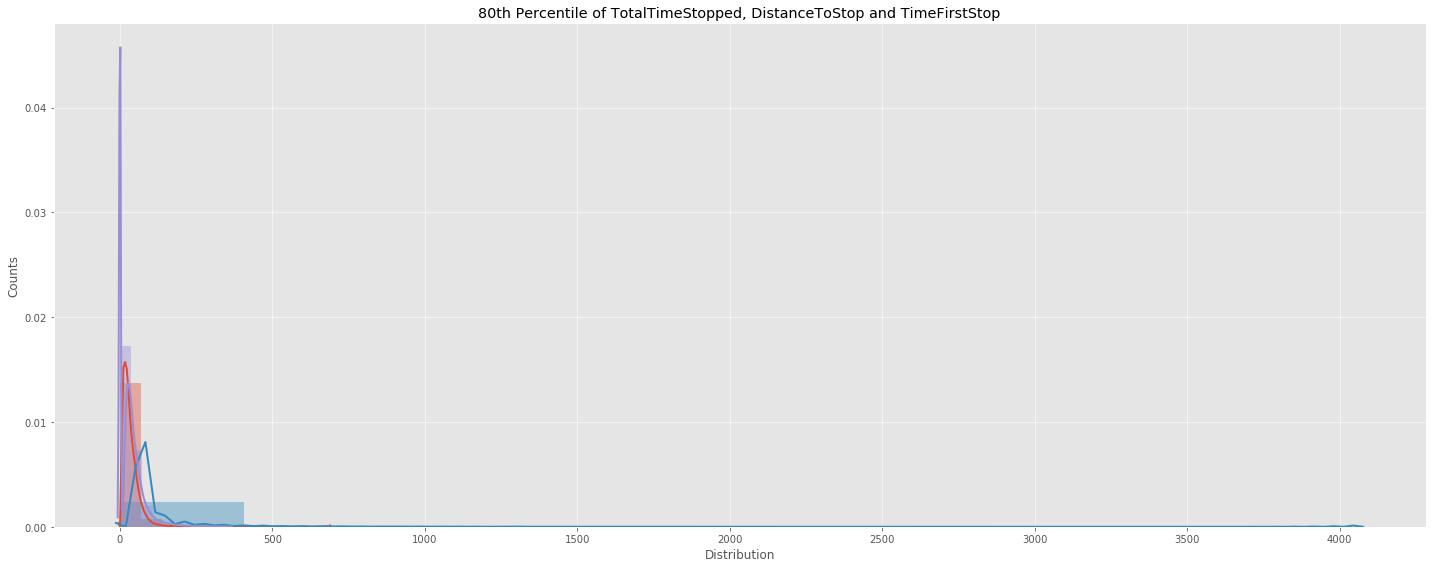

In [170]:
plt.style.use('ggplot')
plt.subplots(figsize=(20, 8))
sns.distplot(train['TotalTimeStopped_p80'], bins=10)
sns.distplot(train['DistanceToFirstStop_p80'], bins=10)
sns.distplot(train['TimeFromFirstStop_p80'], bins=10)

plt.title("80th Percentile of TotalTimeStopped, DistanceToStop and TimeFirstStop")
plt.ylabel("Counts")
plt.xlabel("Distribution")
plt.tight_layout()

* Here we could see that all data are skewed to zero, Maybe few vehicles are moving without stopping.

# Feature Engineering:

In [21]:
pd.set_option('display.max_columns', 30)
train.head(2)

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,Month,Path,TotalTimeStopped_p20,TotalTimeStopped_p40,TotalTimeStopped_p50,TotalTimeStopped_p60,TotalTimeStopped_p80,TimeFromFirstStop_p20,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City,TotalTimeStopped
0,1920335,0,33.78125,-84.4375,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,0,0,6,Marietta Boulevard Northwest_NW_Marietta Boule...,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta,0
1,1920336,0,33.78125,-84.4375,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,0,0,6,Marietta Boulevard Northwest_SE_Marietta Boule...,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta,0


In [22]:
train = pd.get_dummies(train, columns=['EntryHeading' ], prefix=['ENH'], drop_first=False)
train = pd.get_dummies(train, columns=['ExitHeading' ], prefix=['EXH'], drop_first=False)

test = pd.get_dummies(test, columns=['EntryHeading' ], prefix=['ENH'], drop_first=False)
test = pd.get_dummies(test, columns=['ExitHeading' ], prefix=['EXH'], drop_first=False)


In [23]:
train = pd.get_dummies(train, columns=['City' ], prefix=['City'], drop_first=False)
test = pd.get_dummies(test, columns=['City' ], prefix=['City'], drop_first=False)

In [24]:
pd.set_option('display.max_columns', 90)
train.columns

Index(['RowId', 'IntersectionId', 'Latitude', 'Longitude', 'EntryStreetName',
       'ExitStreetName', 'Hour', 'Weekend', 'Month', 'Path',
       'TotalTimeStopped_p20', 'TotalTimeStopped_p40', 'TotalTimeStopped_p50',
       'TotalTimeStopped_p60', 'TotalTimeStopped_p80', 'TimeFromFirstStop_p20',
       'TimeFromFirstStop_p40', 'TimeFromFirstStop_p50',
       'TimeFromFirstStop_p60', 'TimeFromFirstStop_p80',
       'DistanceToFirstStop_p20', 'DistanceToFirstStop_p40',
       'DistanceToFirstStop_p50', 'DistanceToFirstStop_p60',
       'DistanceToFirstStop_p80', 'TotalTimeStopped', 'ENH_E', 'ENH_N',
       'ENH_NE', 'ENH_NW', 'ENH_S', 'ENH_SE', 'ENH_SW', 'ENH_W', 'EXH_E',
       'EXH_N', 'EXH_NE', 'EXH_NW', 'EXH_S', 'EXH_SE', 'EXH_SW', 'EXH_W',
       'City_Atlanta', 'City_Boston', 'City_Chicago', 'City_Philadelphia'],
      dtype='object')

In [25]:
#target:

y1 = train["TotalTimeStopped_p20"]
y2 = train["TotalTimeStopped_p50"]
y3 = train["TotalTimeStopped_p80"]
y4 = train["DistanceToFirstStop_p20"]
y5 = train["DistanceToFirstStop_p50"]
y6 = train["DistanceToFirstStop_p80"]

#feature list:
train = train[["IntersectionId", "Hour","Weekend","Month","Latitude", "Longitude",
              "City_Atlanta", "City_Boston", "City_Chicago", "City_Philadelphia",
              "ENH_E","ENH_N","ENH_NE","ENH_NW","ENH_S","ENH_SE","ENH_SW","ENH_W",
              "EXH_E","EXH_N","EXH_NE","EXH_NW","EXH_S","EXH_SE","EXH_SW","EXH_W"]]

In [26]:
# scale Long and lat columns

scaler = StandardScaler()
for col in ["Latitude", "Longitude"]:
    scaler.fit(train[col].values.reshape(-1, 1))
    train[col] = scaler.transform(train[col].values.reshape(-1, 1))


In [27]:
train.head()

,IntersectionId,Hour,Weekend,Month,Latitude,Longitude,City_Atlanta,City_Boston,City_Chicago,City_Philadelphia,ENH_E,ENH_N,ENH_NE,ENH_NW,ENH_S,ENH_SE,ENH_SW,ENH_W,EXH_E,EXH_N,EXH_NE,EXH_NW,EXH_S,EXH_SE,EXH_SW,EXH_W
0,0,0,0,6,-2.035156,-1.097656,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,6,-2.035156,-1.097656,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0,1,0,6,-2.035156,-1.097656,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1,0,6,-2.035156,-1.097656,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,2,0,6,-2.035156,-1.097656,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


*feature Engineering on test*

In [28]:
#feature list:
test = test[["IntersectionId", "Hour","Weekend","Month", "Latitude", "Longitude",
              "City_Atlanta", "City_Boston", "City_Chicago", "City_Philadelphia",
              "ENH_E","ENH_N","ENH_NE","ENH_NW","ENH_S","ENH_SE","ENH_SW","ENH_W",
              "EXH_E","EXH_N","EXH_NE","EXH_NW","EXH_S","EXH_SE","EXH_SW","EXH_W"]]

In [29]:
#scaler = StandardScaler()
for col in ["Latitude", "Longitude"]:
    scaler.fit(test[col].values.reshape(-1, 1))
    test[col] = scaler.transform(test[col].values.reshape(-1, 1))

In [30]:
test.head()

,IntersectionId,Hour,Weekend,Month,Latitude,Longitude,City_Atlanta,City_Boston,City_Chicago,City_Philadelphia,ENH_E,ENH_N,ENH_NE,ENH_NW,ENH_S,ENH_SE,ENH_SW,ENH_W,EXH_E,EXH_N,EXH_NE,EXH_NW,EXH_S,EXH_SE,EXH_SW,EXH_W
0,1,0,0,6,-2.052734,-1.095703,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,1,0,0,6,-2.052734,-1.095703,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1,1,0,6,-2.052734,-1.095703,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,1,0,6,-2.052734,-1.095703,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1,2,0,6,-2.052734,-1.095703,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


## Model Selction : Training and Evaluations 

In [31]:
def linearRegrestion_evaluation(target):
    
    #x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales, test_size =0.3)
    X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.1, random_state=42)
    
    lreg = LinearRegression()

    #train the model:
    lreg.fit(X_train, y_train)

    #predict with features set:
    y_pred = lreg.predict(X_test)


    print('test score: %.4f' % lreg.score(X_test, y_test)) 
    print('training score: %.4f' % lreg.score(X_train, y_train)) 

    print ('r2 score: ', r2_score(y_test, y_pred))
    print ('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))


**Evaluating LinearRegression: Using train dataset**

In [32]:
#target y1 : "totalTimeStopped_p20" 

linearRegrestion_evaluation(y1)


test score: 0.0056
training score: 0.0061
r2 score:  0.005603831999429598
RMSE:  6.797967


In [33]:
#target y2 : "totalTimeStopped_p50"  
linearRegrestion_evaluation(y2)

test score: 0.0201
training score: 0.0213
r2 score:  0.02010839045277424
RMSE:  15.116953


In [34]:
#target y3 : "totalTimeStopped_p80"  
linearRegrestion_evaluation(y3)

test score: 0.0348
training score: 0.0363
r2 score:  0.03480057408279891
RMSE:  27.35675


In [35]:
def ridge_lasso_evaluation(Model, target):
    X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.1, random_state=42)

    modelobj= Model(alpha =0.0007, random_state=42)
    modelobj.fit(X_train, y_train)
    y_pred = modelobj.predict(X_test)

    #print train Vs test score:
    print("\nTraining Vs Test Scores: ")
    print('test_set R-squared score: %.4f' % modelobj.score(X_test, y_test)) 
    print('train_set R-squared score: %.4f' % modelobj.score(X_train, y_train)) 
     
    #print how prediction differ from actual:
    print("\nModel Performance:")
    print ('r2_score: ', r2_score(y_test, y_pred))
    print ('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))


**Evaluating Ridge: Using train dataset**

In [36]:
#target y1 : "totalTimeStopped_p20"

ridge_lasso_evaluation(Ridge, y1)


Training Vs Test Scores: 
test_set R-squared score: 0.0056
train_set R-squared score: 0.0061

Model Performance:
r2_score:  0.0056038447812523096
RMSE:  6.797966643426516


In [37]:
#target y2 : "totalTimeStopped_p50" 

ridge_lasso_evaluation(Ridge, y2)


Training Vs Test Scores: 
test_set R-squared score: 0.0201
train_set R-squared score: 0.0213

Model Performance:
r2_score:  0.020108430677747147
RMSE:  15.11695200672456


In [38]:
#target y3 : "totalTimeStopped_p80" 

ridge_lasso_evaluation(Ridge, y3)


Training Vs Test Scores: 
test_set R-squared score: 0.0348
train_set R-squared score: 0.0363

Model Performance:
r2_score:  0.0348005841978013
RMSE:  27.35674967735739


**Evaluating lasso: Using train dataset**

In [39]:
#target y1 : "totalTimeStopped_p20"
ridge_lasso_evaluation(Lasso, y1)


Training Vs Test Scores: 
test_set R-squared score: 0.0045
train_set R-squared score: 0.0047

Model Performance:
r2_score:  0.004539766850093607
RMSE:  6.801602836187872


In [40]:
#target y2 : "totalTimeStopped_p50"
ridge_lasso_evaluation(Lasso, y2)


Training Vs Test Scores: 
test_set R-squared score: 0.0179
train_set R-squared score: 0.0187

Model Performance:
r2_score:  0.01786270680267632
RMSE:  15.13426467298955


In [41]:
#target y3 : "totalTimeStopped_p80"
ridge_lasso_evaluation(Lasso, y3)


Training Vs Test Scores: 
test_set R-squared score: 0.0330
train_set R-squared score: 0.0343

Model Performance:
r2_score:  0.033041766467295286
RMSE:  27.38166351180405


with LinearRegression, ridge and lasso do not see satisfactory performance. We need to have boosting algorithm models..!!
This would take hyperparameter tuning and multipler runs to get the best parameters to use for training and prediction.

**Evaluating lightGBM: Using train dataset**

In [42]:
def lightGBM_evaluation(target):
    X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.1, random_state=42)
    lgbm = lgb.LGBMRegressor(objective='regression',learning_rate=0.5, n_estimators=1200,
                              colsample_bytree=1.0, num_leaves=200,max_depth=10,metric='rmse',
                              min_child_samples=100, subsample=1)
    
    lgbm.fit(X_train, y_train)
    y_pred = lgbm.predict(X_test)
    
    #print train Vs test score:
    print("\nTraining Vs Test Scores: ")
    print('While testing  R-squared score: %.4f' % lgbm.score(X_test, y_test)) 
    print('While training R-squared score: %.4f' % lgbm.score(X_train, y_train)) 
   
    #print how prediction differ from actual:
    print("\nModel Performance:")
    print ('r2_score: ', r2_score(y_test, y_pred))
    print ('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
        

In [43]:
#target y1 : "totalTimeStopped_p20"
lightGBM_evaluation(y1)


Training Vs Test Scores: 
While testing  R-squared score: 0.3115
While training R-squared score: 0.5701

Model Performance:
r2_score:  0.3115353665802324
RMSE:  5.656400196529063


In [44]:
#target y2 : "totalTimeStopped_p50"
lightGBM_evaluation(y2)


Training Vs Test Scores: 
While testing  R-squared score: 0.5470
While training R-squared score: 0.7036

Model Performance:
r2_score:  0.5470312604397809
RMSE:  10.278017182365753


In [45]:
#target y3 : "totalTimeStopped_p80"
lightGBM_evaluation(y3)


Training Vs Test Scores: 
While testing  R-squared score: 0.5989
While training R-squared score: 0.7314

Model Performance:
r2_score:  0.5989339735822842
RMSE:  17.634530800659185


**Evaluating Catboost: Using train dataset**

In [46]:
def catboost_evaluation(target):
    X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.1, random_state=42)
    catb = CatBoostRegressor(iterations=800,learning_rate=0.2,depth=14,
                             eval_metric='RMSE',random_seed = 42,
                             bagging_temperature = 0.2,od_type='Iter',
                             metric_period = 75, early_stopping_rounds=10)

    catb.fit(X_train, y_train)
    y_pred=catb.predict(X_test)
    #print train Vs test score:
    print("\nTraining Vs Test Scores: ")
    print('test_set R-squared score: %.4f' % catb.score(X_test, y_test)) 
    print('train_set R-squared score: %.4f' % catb.score(X_train, y_train)) 
     
    #print how prediction differ from actual:
    print("\nModel Performance:")
    print ('r2_score: ', r2_score(y_test, y_pred))
    print ('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

In [47]:
#target y1 : "totalTimeStopped_p20"
catboost_evaluation(y1)

0:	learn: 6.8953337	total: 826ms	remaining: 11m
75:	learn: 6.0408013	total: 53.4s	remaining: 8m 28s
150:	learn: 5.7212413	total: 1m 45s	remaining: 7m 34s
225:	learn: 5.5180059	total: 2m 34s	remaining: 6m 32s
300:	learn: 5.3524286	total: 3m 25s	remaining: 5m 40s
375:	learn: 5.2155385	total: 4m 17s	remaining: 4m 50s
450:	learn: 5.0966224	total: 5m 9s	remaining: 3m 59s
525:	learn: 4.9972132	total: 6m	remaining: 3m 7s
600:	learn: 4.9021022	total: 6m 53s	remaining: 2m 16s
675:	learn: 4.8177052	total: 7m 44s	remaining: 1m 25s
750:	learn: 4.7388049	total: 8m 36s	remaining: 33.7s
799:	learn: 4.6885135	total: 9m 10s	remaining: 0us

Training Vs Test Scores: 
test_set R-squared score: 0.3131
train_set R-squared score: 0.5432

Model Performance:
r2_score:  0.31311052488706004
RMSE:  5.649925769690621


In [48]:
#target y2 : "totalTimeStopped_p50"
catboost_evaluation(y2)

0:	learn: 15.1409542	total: 653ms	remaining: 8m 41s
75:	learn: 12.4288310	total: 47.5s	remaining: 7m 32s
150:	learn: 11.5668037	total: 1m 34s	remaining: 6m 47s
225:	learn: 11.0364540	total: 2m 21s	remaining: 5m 59s
300:	learn: 10.6089740	total: 3m 7s	remaining: 5m 11s
375:	learn: 10.2885594	total: 3m 54s	remaining: 4m 24s
450:	learn: 10.0316753	total: 4m 41s	remaining: 3m 37s
525:	learn: 9.8079479	total: 5m 29s	remaining: 2m 51s
600:	learn: 9.6016270	total: 6m 15s	remaining: 2m 4s
675:	learn: 9.4201824	total: 7m 1s	remaining: 1m 17s
750:	learn: 9.2550450	total: 7m 48s	remaining: 30.6s
799:	learn: 9.1648616	total: 8m 19s	remaining: 0us

Training Vs Test Scores: 
test_set R-squared score: 0.5308
train_set R-squared score: 0.6432

Model Performance:
r2_score:  0.5307943614550377
RMSE:  10.460605766311053


In [49]:
#target y3 : "totalTimeStopped_p80"
catboost_evaluation(y3)

0:	learn: 27.1860145	total: 676ms	remaining: 9m
75:	learn: 22.0969439	total: 47.5s	remaining: 7m 32s
150:	learn: 20.5275059	total: 1m 34s	remaining: 6m 44s
225:	learn: 19.4630228	total: 2m 20s	remaining: 5m 57s
300:	learn: 18.7253792	total: 3m 8s	remaining: 5m 12s
375:	learn: 18.1421585	total: 3m 53s	remaining: 4m 23s
450:	learn: 17.6138388	total: 4m 39s	remaining: 3m 36s
525:	learn: 17.1974197	total: 5m 26s	remaining: 2m 50s
600:	learn: 16.8271297	total: 6m 14s	remaining: 2m 3s
675:	learn: 16.5055400	total: 7m 1s	remaining: 1m 17s
750:	learn: 16.2208396	total: 7m 48s	remaining: 30.6s
799:	learn: 16.0393167	total: 8m 18s	remaining: 0us

Training Vs Test Scores: 
test_set R-squared score: 0.5752
train_set R-squared score: 0.6677

Model Performance:
r2_score:  0.5751520369769147
RMSE:  18.149837518819954


## Predictions : Using Catboost and LightGBM Model 

After seeing the performance of catboost and lightGBM model with the training set, now actually using them to predict 'test.csv' dataset.

**Prediction-1: First Prediction Set -> Set1**

In [53]:
#using catboost to prediect test dataset: using same parameters as while in training

catb_pred = CatBoostRegressor(iterations=800,learning_rate=0.2,depth=14,
                             eval_metric='RMSE',random_seed = 42,
                             bagging_temperature = 0.2,od_type='Iter',
                             metric_period = 75, early_stopping_rounds=10)

#predicting y1 target:
catb_pred.fit(train, y1)
y1_pred_set1=catb_pred.predict(test)

#predicting y2 target:
catb_pred.fit(train, y2)
y2_pred_set1=catb_pred.predict(test)

#predicting y3 target:
catb_pred.fit(train, y3)
y3_pred_set1=catb_pred.predict(test)

#predicting y4 target:
catb_pred.fit(train, y4)
y4_pred_set1=catb_pred.predict(test)

#predicting y5 target:
catb_pred.fit(train, y5)
y5_pred_set1=catb_pred.predict(test)


0:	learn: 6.8763916	total: 485ms	remaining: 6m 27s
75:	learn: 6.0484983	total: 29.4s	remaining: 4m 39s
150:	learn: 5.7363810	total: 59s	remaining: 4m 13s
225:	learn: 5.5290246	total: 1m 28s	remaining: 3m 43s
300:	learn: 5.3670913	total: 1m 56s	remaining: 3m 13s
375:	learn: 5.2303364	total: 2m 24s	remaining: 2m 43s
450:	learn: 5.1126759	total: 2m 53s	remaining: 2m 13s
525:	learn: 5.0168962	total: 3m 21s	remaining: 1m 44s
600:	learn: 4.9278817	total: 3m 48s	remaining: 1m 15s
675:	learn: 4.8467272	total: 4m 16s	remaining: 47.1s
750:	learn: 4.7674596	total: 4m 45s	remaining: 18.6s
799:	learn: 4.7174285	total: 5m 3s	remaining: 0us
0:	learn: 15.0743727	total: 399ms	remaining: 5m 18s
75:	learn: 12.4453674	total: 32s	remaining: 5m 4s
150:	learn: 11.5545619	total: 1m	remaining: 4m 19s
225:	learn: 10.9876984	total: 1m 28s	remaining: 3m 44s
300:	learn: 10.5879260	total: 1m 56s	remaining: 3m 13s
375:	learn: 10.2698438	total: 2m 24s	remaining: 2m 43s
450:	learn: 9.9978852	total: 2m 53s	remaining: 2

**Prediction-2: Second Prediction Set -> Set2**

In [54]:
#using lightGBM for predicting test dataset:using same parameters as while in training

lgbm_pred = lgb.LGBMRegressor(objective='regression',learning_rate=0.5, n_estimators=1200,
                              colsample_bytree=1.0, num_leaves=200,max_depth=10,metric='rmse',
                              min_child_samples=100, subsample=1)

#predicting y1 target:
lgbm_pred.fit(train, y1)
y1_pred_set2 = lgbm_pred.predict(test)

#predicting y2 target:
lgbm_pred.fit(train, y2)
y2_pred_set2 = lgbm_pred.predict(test)

#predicting y3 target:
lgbm_pred.fit(train, y3)
y3_pred_set2 = lgbm_pred.predict(test)

#predicting y4 target:
lgbm_pred.fit(train, y4)
y4_pred_set2 = lgbm_pred.predict(test)

#predicting y5 target:
lgbm_pred.fit(train, y5)
y5_pred_set2 = lgbm_pred.predict(test)

## Submission : Adding Predictions To Submission File

Here creating two seperate submission file for catboost and lightGBM predictions.

In [77]:
#loading sample submission: making copy for two separate file
submission_set1_catboost = pd.read_csv("sample_submission.csv")
submission_set2_lightGBM = pd.read_csv("sample_submission.csv")

#creating list of predictions: catboost and lightGBM
catboost_pred_set1 = [y1_pred_set1, y2_pred_set1, y3_pred_set1, y4_pred_set1, y5_pred_set1]
lightGBM_pred_set2 = [y1_pred_set2, y2_pred_set2, y3_pred_set2, y4_pred_set2, y5_pred_set2]


In [87]:
#function to make submission: separate for catboost and lightGBM
def make_submission(single_pred, pred_list, submission_name, sample_df):
    prediction_all = []
    for i in range(len(single_pred)):
        for j in pred_list:
            prediction_all.append(j[i])
    sample_df["Target"] = pd.Series(prediction_all)
    sample_df.to_csv(submission_name, index = False)


In [88]:
#Set-1:submission -> catboost
make_submission(catboost_pred_set1[0], catboost_pred_set1, "submission_set1_catboost.csv", submission_set1_catboost)

#Set-2:submission -> lightGBM
make_submission(lightGBM_pred_set2[0], lightGBM_pred_set2, "submission_set2_lightGBM.csv", submission_set2_lightGBM)

In [89]:
#looking into first 6 predictions for both : catboost and lightGBM
cat = pd.read_csv("submission_set1_catboost.csv")
lgbm = pd.read_csv("submission_set2_lightGBM.csv")

In [90]:
cat.head(6)

,TargetId,Target
0,0_0,-3.161775
1,0_1,10.535286
2,0_2,26.896336
3,0_3,-3.259313
4,0_4,4.056283
5,0_5,0.007131


In [91]:
lgbm.head(6)

,TargetId,Target
0,0_0,-4.289570
1,0_1,4.211500
2,0_2,18.688586
3,0_3,-2.993942
4,0_4,85.454325
5,0_5,-3.198083
